In [242]:
!pip install dash

Defaulting to user installation because normal site-packages is not writeable


In [243]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

Número de colunas: 50
Index(['Rank-setter', 'Player-Name', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'average-per-match-setter', 'Success-percent-setter',
       'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'average-per-match-server', 'Success-percent-serve',
       'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'average-per-match-receive',
       'Success-percent-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'average-per-match-dig', 'Success-percent-dig', 'Total-dig',
       'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'average-per-match-block', 'Efficiency-percent-block', 'Total-block',
       'Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'average-per-match-attack'

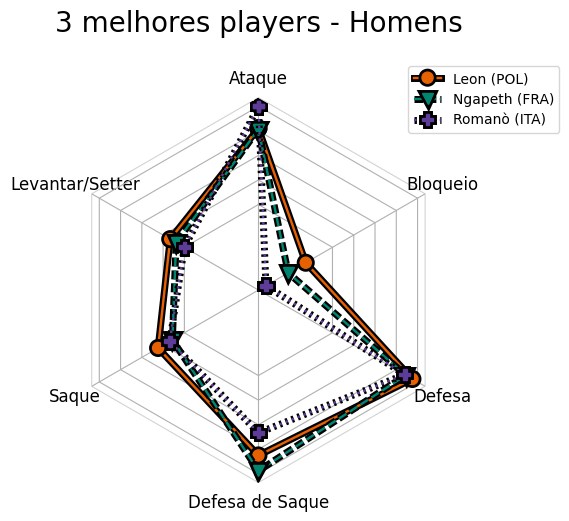

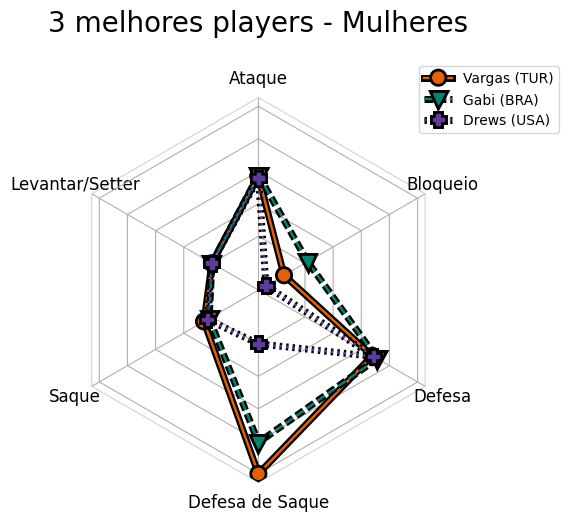

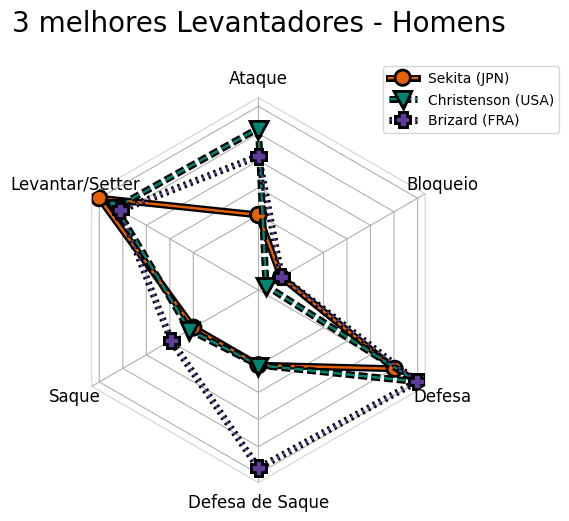

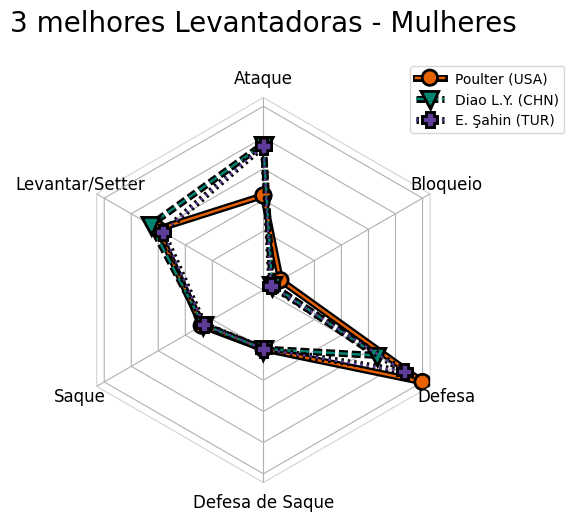

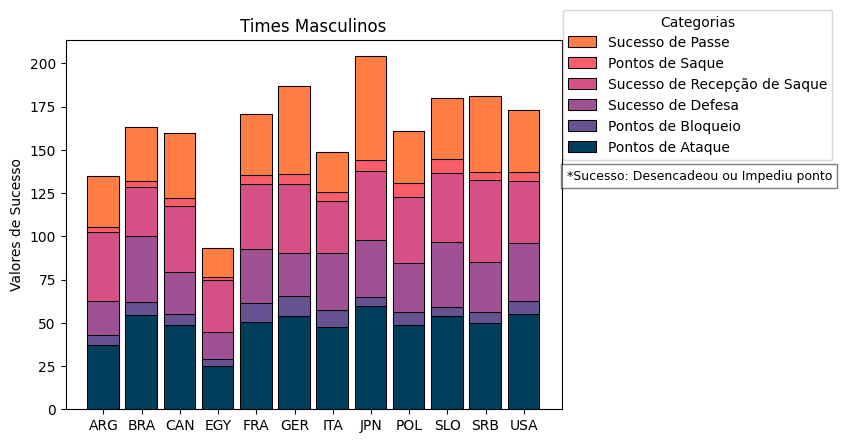

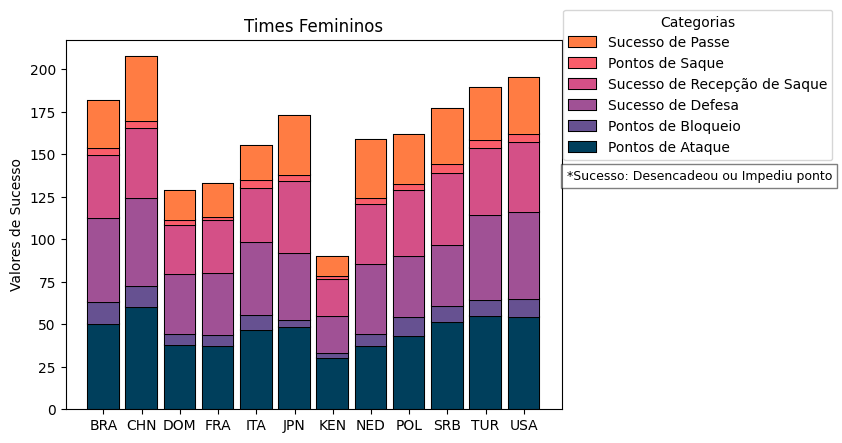

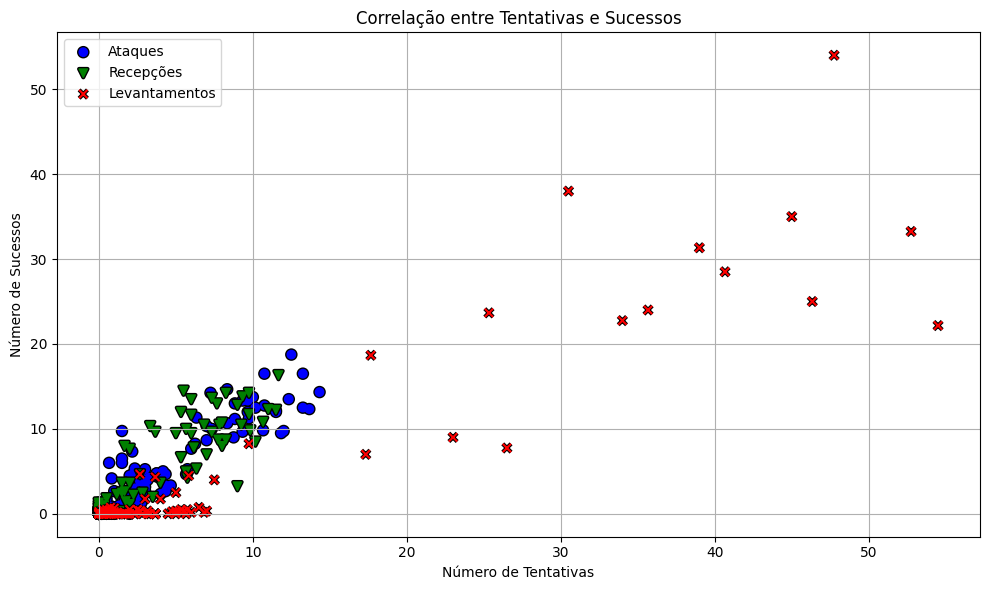

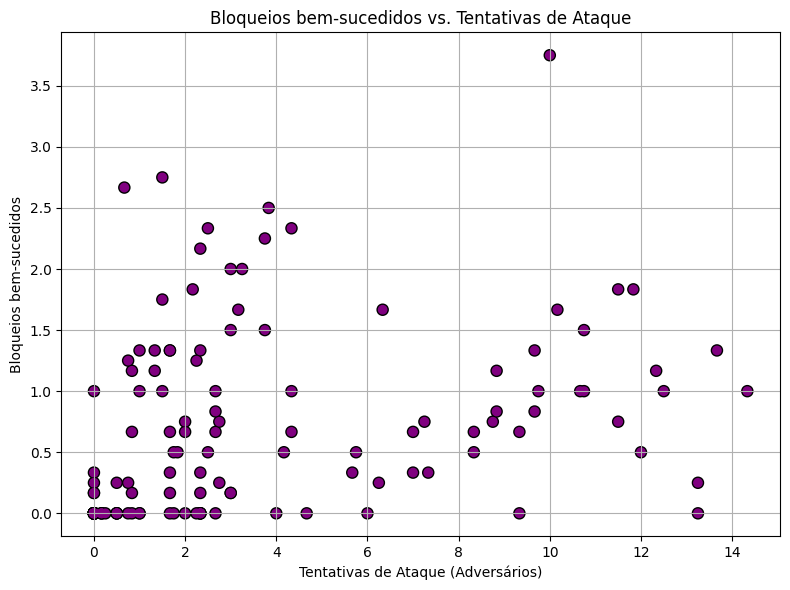

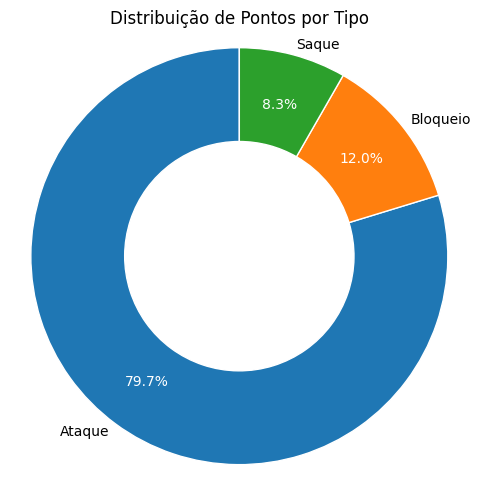

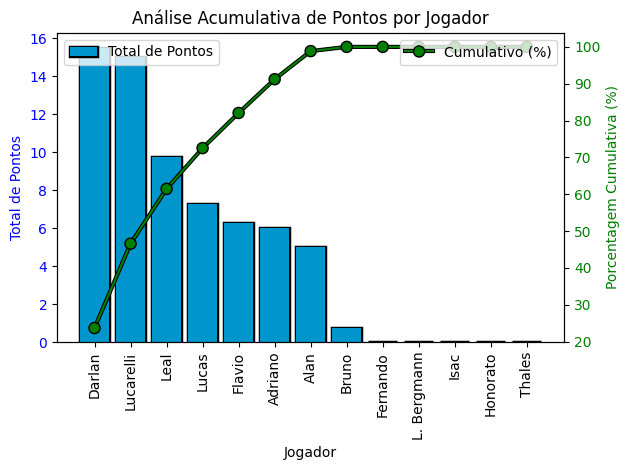

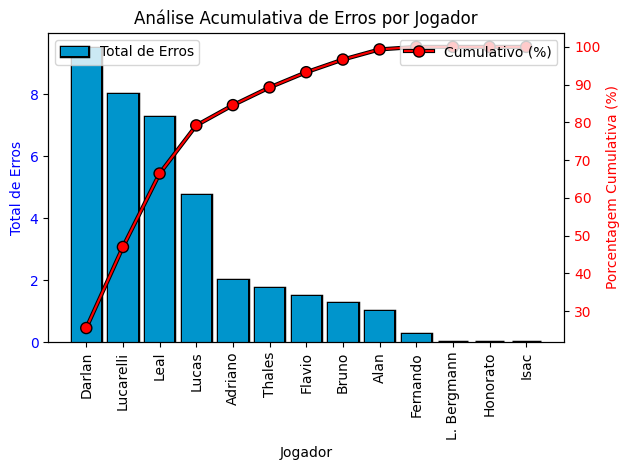

In [244]:
%run main_ecvd_2.ipynb

# Tratamento de Dados

## Dados Masculino

In [245]:
# Read the CSV file
paris_men_attackers = pd.read_csv("datasets/Olympics-paris-men/olympics_paris_men_attackers.txt")
# Get a list of all CSV files in a directory
csv_files = glob.glob('datasets/Olympics-paris-men/*.txt')

# Create an empty dataframe to store the combined data
df_paris_men = paris_men_attackers[["Player-Name","Team"]].copy()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df.drop(columns=['Team']) # For error prevention in merge
    df_paris_men = pd.merge(df, df_paris_men, on='Player-Name', suffixes=("","")).fillna(0)

# Create the teams_men DataFrame with total matches
df_temp = df_paris_men.drop_duplicates(['Team'])
teams_men = pd.DataFrame({
    "Team": df_temp["Team"],
    "total-matches": [4, 6, 6, 4, 6, 6, 4, 3, 4, 3, 3, 3]  # datas from https://en.volleyballworld.com/volleyball/competitions/volleyball-olympic-games-paris-2024/schedule/#fromDate=2024-08-10
})

# Merge df_paris_men with teams_men to add total-matches
df_paris_men = pd.merge(df_paris_men, teams_men, on='Team', suffixes=("", "")).fillna(0)

# Print the combined dataframe
print("Número de colunas:", len(df_paris_men.columns))
print(df_paris_men.columns)

Número de colunas: 50
Index(['Rank-setter', 'Player-Name', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'average-per-match-setter', 'Success-percent-setter',
       'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'average-per-match-server', 'Success-percent-serve',
       'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'average-per-match-receive',
       'Success-percent-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'average-per-match-dig', 'Success-percent-dig', 'Total-dig',
       'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'average-per-match-block', 'Efficiency-percent-block', 'Total-block',
       'Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'average-per-match-attack'

In [246]:
# Normalize the data per total-match from each player
df_paris_men[['Rank-setter', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'Total-dig', 'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'Total-block','Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'Total-attack']] = df_paris_men[['Rank-setter', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'Total-dig', 'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'Total-block','Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'Total-attack']].div(df_paris_men["total-matches"], axis=0)

## Dados Femininos

In [247]:
# Read the CSV file
paris_women_attackers = pd.read_csv("datasets/Olympics-paris-women/olympics_paris_women_attackers.txt")
# Get a list of all CSV files in a directory
csv_files = glob.glob('datasets/Olympics-paris-women/*.txt')

# Create an empty dataframe to store the combined data
df_paris_women = paris_women_attackers[["Player-Name","Team"]].copy()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df.drop(columns=['Team']) # For error prevention in merge
    df_paris_women = pd.merge(df, df_paris_women, on='Player-Name', suffixes=("","")).fillna(0)

# Create the teams_men DataFrame with total matches
df_temp = df_paris_women.drop_duplicates(['Team'])

teams_women = pd.DataFrame({
    "Team": df_temp["Team"],
    "total-matches": [6, 4, 6, 6, 6, 4, 4, 4, 5, 3, 3, 3]  # datas from https://en.volleyballworld.com/volleyball/competitions/volleyball-olympic-games-paris-2024/schedule/#fromDate=2024-08-10
})

# Merge df_paris_women with teams_women to add total-matches
df_paris_women = pd.merge(df_paris_women, teams_women, on='Team', suffixes=("", "")).fillna(0)

# Print the combined dataframe
print("Número de colunas:", len(df_paris_women.columns))
print(df_paris_women.columns)

Número de colunas: 50
Index(['Rank-setter', 'Player-Name', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'average-per-match-setter', 'Success-percent-setter',
       'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'average-per-match-server', 'Success-percent-serve',
       'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'average-per-match-receive',
       'Success-percent-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'average-per-match-dig', 'Success-percent-dig', 'Total-dig',
       'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'average-per-match-block', 'Efficiency-percent-block', 'Total-block',
       'Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'average-per-match-attack'

In [248]:
# Normalize the data per total-match from each player
df_paris_women[['Rank-setter', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'Total-dig', 'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'Total-block','Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'Total-attack']] = df_paris_women[['Rank-setter', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'Total-dig', 'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'Total-block','Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'Total-attack']].div(df_paris_women["total-matches"], axis=0)

In [249]:
print("qtd mulheres:", len(df_paris_women))
print("qtd homens:", len(df_paris_men))

qtd mulheres: 149
qtd homens: 146


In [250]:
df_paris_geral = pd.concat([df_paris_men, df_paris_women], ignore_index=True)

In [251]:
df_paris_geral

,Rank-setter,Player-Name,Successful-setter,Errors-setter,Attempts-setter,average-per-match-setter,Success-percent-setter,Total-setter,Rank-server,serve-points,...,Total-block,Rank-attacker,Points-attacks,Errors-attack,Attempts-shots-attack,average-per-match-attack,Success-percent-attack,Total-attack,Team,total-matches
0,0.250000,Sekita,54.0,0.500000,47.750000,54.0,52.81,102.250000,3.000000,0.000000,...,5.250000,13.250000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,JPN,4
1,0.333333,Christenson,35.0,0.333333,45.000000,35.0,43.57,80.333333,1.666667,0.333333,...,10.333333,7.500000,1.333333,0.000000,1.833333,1.33,42.11,3.166667,USA,6
2,0.500000,Brizard,28.5,0.333333,40.666667,28.5,41.01,69.500000,0.333333,1.833333,...,8.500000,8.166667,0.666667,0.333333,1.333333,0.67,28.57,2.333333,FRA,6
3,1.000000,Kampa,38.0,0.250000,30.500000,38.0,55.27,68.750000,2.000000,1.000000,...,5.250000,12.750000,0.500000,0.000000,0.750000,0.50,40.00,1.250000,GER,4
4,0.833333,Janusz,25.0,0.000000,46.333333,25.0,35.05,71.333333,1.333333,0.666667,...,4.833333,8.833333,0.000000,0.166667,0.833333,0.00,0.00,1.000000,POL,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,5.750000,Milenković,0.0,0.000000,0.500000,0.0,0.00,0.500000,2.000000,0.000000,...,0.250000,12.000000,0.250000,0.000000,0.250000,0.25,50.00,0.500000,SRB,4
291,3.833333,Güneş,0.0,0.166667,1.333333,0.0,0.00,1.500000,0.833333,0.500000,...,9.833333,6.166667,2.000000,0.833333,2.166667,3.00,40.00,5.000000,TUR,6
292,3.833333,Spirito,0.0,0.000000,0.000000,0.0,0.00,0.000000,1.333333,0.000000,...,0.000000,8.166667,0.000000,0.000000,0.000000,0.00,0.00,0.000000,ITA,6
293,5.750000,Popović M.,0.0,0.000000,0.750000,0.0,0.00,0.750000,2.000000,0.000000,...,5.250000,11.000000,1.250000,0.250000,1.500000,2.50,41.67,3.000000,SRB,4


# Dash

In [252]:
import plotly.express as px
from dash import Dash #from jupyter_dash import JupyterDash
from dash import html, dcc, Output, Input
from pandas import read_csv

In [253]:
from plotly.tools import mpl_to_plotly

In [254]:
def radar_factory(num_vars, frame='polygon'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    theta = np.concatenate((theta, [theta[0]]))  # Close the loop
    
    class RadarTransform(PolarAxes.PolarTransform):
        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

# Function to plot radar chart
def plot_radar_chart(data, metrics, title):
    N = len(metrics)
    theta = radar_factory(N, frame='polygon')
    
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'radar'})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    ax.spines['polar'].set_zorder(1)
    ax.spines['polar'].set_color('lightgrey')
    markers = ['o', 'v', 'P', '^', 's', 'x', 'D']
    linestyles = ['-', '--', ':' , '-.']
    color_palette = ['#e66101', '#018571', '#5e3c99', '#b2abd2', '#FF9900', '#FFFFFF']
    max_value = data[metrics].max()
    for idx, (i, row) in enumerate(data.iterrows()):
        values = row[metrics].values.flatten().tolist()
        values = values + [values[0]]
        ax.plot(theta, values, linewidth=1.75, linestyle=linestyles[idx], label=f"{row['Player-Name']} ({row['Team']})", marker=markers[idx], markersize=8, color=color_palette[idx % len(color_palette)], path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        #ax.fill(theta, values, alpha=0.50, color=color_palette[idx % len(color_palette)])
    
    yticks = np.linspace(0, max_value, num=5)  # Generate 5 evenly spaced y-ticks
    ax.set_yticks(yticks)
    ax.set_yticklabels([])  # Remove y-tick labels
    plt.xticks(theta[:-1], metrics, color='black', size=12)  # Exclude the last label
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1)) 
    ax.set_xticklabels(['Ataque', 'Bloqueio', 'Defesa', 'Defesa de Saque', 'Saque', 'Levantar/Setter'])
    return fig

In [330]:
from dash import Dash, html, dcc, Output, Input
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df_paris_geral = pd.concat([df_paris_men, df_paris_women], ignore_index=True)

app = Dash(__name__)

app.layout = html.Div([
    html.H1(children='Dados de Vôlei nas Olimpíadas de Paris', style={'color': '#117029'}),
    html.Div(children='Dashboard com Dash.'),
    dcc.Dropdown(
        id="sex",
        options=[
            {'label': 'Feminino', 'value': 'Feminino'},
            {'label': 'Masculino', 'value': 'Masculino'},
            {'label': 'Feminino e Masculino', 'value': 'Feminino e Masculino'}
        ],
        value="Feminino e Masculino",
        clearable=False
    ),
    html.Div([
        dcc.Dropdown(
            id="country",
            options=[{'label': country, 'value': country} for country in df_paris_geral['Team'].unique()],
            value='BRA',
            clearable=False,
        ),
        dcc.Graph(id='pie_chart')]),

    html.Div([
        dcc.Dropdown(
            id="player",
            options=[{'label': player, 'value': player} for player in df_paris_geral['Player-Name'].unique()],
            value='Sekita',
            clearable=False,
        ),
        dcc.Graph(id='players_chart')]),
])

@app.callback(
    Output("pie_chart", "figure"),
    Input("sex", "value"),
    Input("country", "value")
)
def generate_pie_chart(sex, country):
    if sex == "Feminino":
        df = df_paris_women.copy()
    elif sex == "Masculino":
        df = df_paris_men.copy()
    elif sex == "Feminino e Masculino":
        df = df_paris_geral.copy()
    else:
        df = pd.DataFrame()  # Default empty dataframe

    df = df[df['Team'] == country]

    labels = ['Ataque', 'Bloqueio', 'Saque']
    sizes = [
        df['Attack-Points'].sum(),
        df['Block-Points'].sum(),
        df['Serve-Points'].sum()
    ]

    fig = px.pie(values=sizes, names=labels, hole=0.3)

    return fig

@app.callback(
    Output("players_chart", "figure"),
    Input("sex", "value"),
    Input("player", "value")
)
def generate_player_statistics(sex, player):
    if sex == "Feminino":
        df = df_paris_women.copy()
    elif sex == "Masculino":
        df = df_paris_men.copy()
    elif sex == "Feminino e Masculino":
        df = df_paris_geral.copy()
    else:
        df = pd.DataFrame()  # Default empty dataframe

    data = df.loc[df['Player-Name'] == player]
    metrics = ['Success-percent-attack', 'Efficiency-percent-block', 'Success-percent-dig', 'Success-percent-receive', 'Success-percent-serve', 'Success-percent-setter']
    
    fig = go.Figure()

    for idx, row in data.iterrows():
        fig.add_trace(go.Scatterpolar(
            r=row[metrics].values,
            theta=['Ataque', 'Bloqueio', 'Defesa', 'Defesa de Saque', 'Saque', 'Levantar/Setter'],
            fill='toself',
            name=f"{row['Player-Name']} ({row['Team']})",
            marker=dict(
                size=10
            ),
            line=dict(
                width=3
            )
        ))

    fig.update_polars(
        angularaxis=dict(
            rotation=0,
            direction="clockwise",
            showline=True,
            linecolor="black",
            showticklabels=True,
            ticks="outside",
            tickwidth=1,
            ticklen=1,
            tickcolor="black",
            tickfont=dict(
                family="Arial",
                size=20,
                color="black"
            ),
            showgrid = True,
        ),
        radialaxis=dict(
            showline=True,
            range=[0, data[metrics].max().max() + 5],
            showticklabels=False
        )
    )
    fig.update_layout(
        showlegend=True
    )

    return fig

if __name__ == '__main__':
    app.run(debug=True)